In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/merged-orderproductcustomercharts/orders_products_customers_merged_with charts.pkl
/kaggle/input/orderproductsmerge/orders_products_merged_derived.pkl
/kaggle/input/departmentdataset/departments_wrangled.csv


In [2]:
df_updated1=pd.read_pickle('/kaggle/input/merged-orderproductcustomercharts/orders_products_customers_merged_with charts.pkl')

In [3]:
df_department=pd.read_csv('/kaggle/input/departmentdataset/departments_wrangled.csv')

In [4]:
df_department

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
#renaming of Unnamed: 0 to department_id
df_department.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [6]:
#merging updated1 df from part 1 of task 4.10 to departments w.r.t age, income level and products 
merged_df = df_updated1.merge(df_department, on = 'department_id', indicator = 'created')


In [7]:
# exporting the latest dataframe with orders,products,customers and departments
merged_df.to_pickle('orders_products_customers_deparments.pkl')


In [8]:
BarChart_department=merged_df['department'].value_counts(ascending=True)

In [9]:
BarChart_department

department
bulk                 32841
other                33415
missing              62541
pets                 90339
alcohol             139573
international       248722
babies              403066
personal care       411807
breakfast           653419
meat seafood        655729
household           678295
dry goods pasta     797683
deli                978050
canned goods        982041
bakery             1092488
pantry             1732114
frozen             2059325
beverages          2507241
snacks             2699351
dairy eggs         5053440
produce            8859944
Name: count, dtype: int64

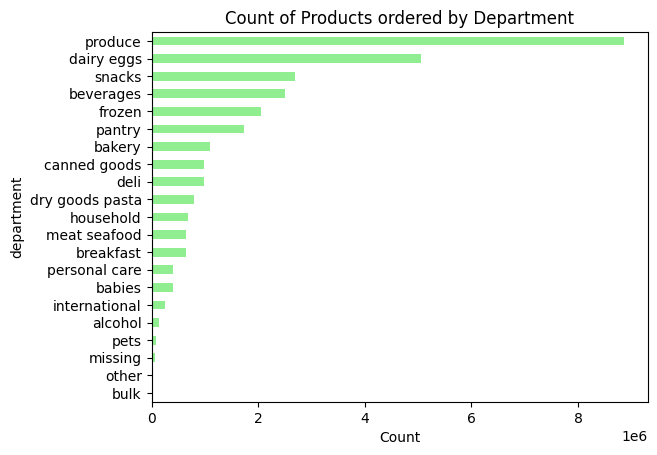

In [10]:
# creating a horizontal barchart for department file
Department_Products = BarChart_department.plot(kind = 'barh', color = 'lightgreen', xlabel = 'Count', title='Count of Products ordered by Department')

In [11]:
Department_Products.figure.savefig('BarChart_Department.png')

In [12]:
merged_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'spending_average', 'spender_flag', 'customer_frequency',
       'frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'region', 'customer_activity', 'age_group', 'income_group',
       'dependant_flag', 'department', 'created'],
      dtype='object')

In [13]:
# using crosstab function on department with age group
Cross_DepartmentAgeGroup= pd.crosstab(merged_df['age_group'],merged_df['department'], dropna=False)

In [14]:
Cross_DepartmentAgeGroup

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Adults,85869,248534,667658,1529470,399348,19829,599898,3085460,598183,485512,...,413172,152074,397468,38092,20410,1057387,252746,53683,5408831,1650810
Senior,35266,104216,288610,667439,170859,8780,259659,1336003,258631,211025,...,181050,65257,176134,16286,8666,458942,107730,24467,2350914,711539
Youth,18438,50316,136220,310332,83212,4232,122484,631977,121236,101146,...,84073,31391,82127,8163,4339,215785,51331,12189,1100199,337002


In [15]:
Cross_DepartmentIncome=pd.crosstab(merged_df['income_group'],merged_df['department'],dropna= False)

In [16]:
Cross_DepartmentIncome

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
HIGH,23431,52210,145039,306242,81517,3601,128763,644505,122936,103465,...,90179,31870,88994,7946,4432,225898,52197,12668,1107778,299077
LOW,17104,28456,102955,371586,88698,4588,75482,486140,102717,61483,...,83833,20793,32924,6288,3745,159544,45879,8273,799312,542916
MEDIUM,99038,322400,844494,1829413,483204,24652,777796,3922795,752397,632735,...,504283,196059,533811,48307,25238,1346672,313731,69398,6952854,1857358


7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [17]:
df_updated=pd.read_pickle('/kaggle/input/orderproductsmerge/orders_products_merged_derived.pkl')

In [18]:
merged_df.describe()

,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,spending_average,customer_frequency,age,n_dependants,income
count,3.017142e+07,3.017142e+07,3.017142e+07,2.866855e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07
mean,1.822380e+01,2.742373e+00,1.340360e+01,1.063360e+01,2.559794e+04,8.364752e+00,6.139803e-01,2.559965e+04,7.118457e+01,9.923708e+00,1.185801e+01,3.519922e+01,1.185801e+01,1.079307e+01,4.947082e+01,1.502004e+00,9.977020e+04
std,1.769653e+01,2.088409e+00,4.249694e+00,8.033114e+00,1.407927e+04,7.136493e+00,4.868352e-01,1.408082e+04,3.822635e+01,6.283019e+00,4.843307e+02,2.475268e+01,7.808287e+01,5.342124e+00,1.848772e+01,1.118931e+00,4.318342e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354800e+04,3.000000e+00,0.000000e+00,1.354800e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.500000e+01,7.395238e+00,6.716634e+00,3.300000e+01,1.000000e+00,6.742400e+04
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.527900e+04,6.000000e+00,1.000000e+00,2.528000e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.900000e+01,7.825000e+00,9.521276e+00,4.900000e+01,2.000000e+00,9.682300e+04
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794000e+04,1.100000e+01,1.000000e+00,3.794400e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.900000e+01,8.246487e+00,1.404975e+01,6.500000e+01,3.000000e+00,1.281500e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [19]:
# Aggregation function for customer based on user_id for expenditure
merged_df.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

order_number                    prices               
                 max min       mean        max  min      mean
user_id                                                      
1                 10   1   5.813559  14.000000  1.0  6.367797
1000               7   1   3.980583  15.000000  1.2  8.407767
10000             72   1  35.973443  24.200001  1.2  8.045421
100000             9   1   4.798246  16.200001  1.0  8.119298
100001            66   1  35.275523  18.700001  1.0  7.749815
...              ...  ..        ...        ...  ...       ...
99992             10   1   5.339286  24.000000  1.4  9.133928
99993             23   1  13.333333  21.600000  1.2  8.035461
99994             11   1   6.042683  14.300000  1.1  8.504878
99996             12   1   5.898438  15.000000  1.1  7.410937
99999             34   1  16.565350  24.200001  1.1  7.289969

[146466 rows x 6 columns]

In [20]:
## Aggregation function for customer based on user_id for frequency
merged_df.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_previous_order': ['max', 'min', 'mean']})

order_number                days_since_previous_order                 
                 max min       mean                       max   min       mean
user_id                                                                       
1                 10   1   5.813559                      30.0   0.0  20.259260
1000               7   1   3.980583                      30.0   5.0  11.647727
10000             72   1  35.973443                      17.0   0.0   4.949580
100000             9   1   4.798246                      30.0   8.0  23.533981
100001            66   1  35.275523                      29.0   0.0   6.332503
...              ...  ..        ...                       ...   ...        ...
99992             10   1   5.339286                      30.0   6.0  26.442308
99993             23   1  13.333333                      14.0   2.0   5.432836
99994             11   1   6.042683                      30.0   5.0  19.144737
99996             12   1   5.898438                      30.0  15.0  21.672413
99999             34   1  16.565350                      24.0   1.0   7.638365

[146466 rows x 6 columns]

8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [21]:
Cross_RegionDepartment=pd.crosstab(merged_df['region'],merged_df['department'] ,dropna=False)

In [22]:
Cross_RegionDepartment

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,32883,94027,255082,583228,151846,7806,230173,1182974,228200,187653,...,161733,58854,153688,15056,7737,408085,97357,20748,2080206,629156
Northeast,24114,71370,194076,451674,114701,5482,171517,892624,173837,139489,...,120839,43342,115204,11104,6060,303892,72593,17242,1554985,481100
South,47069,136961,362204,837788,217548,10953,327746,1682429,325082,264766,...,222964,82329,217724,21024,11273,575074,138415,28893,2955891,894880
West,35507,100708,281126,634551,169324,8600,252605,1295413,250931,205775,...,172759,64197,169113,15357,8345,445063,103442,23456,2268862,694215


Text(0, 0.5, 'Region')

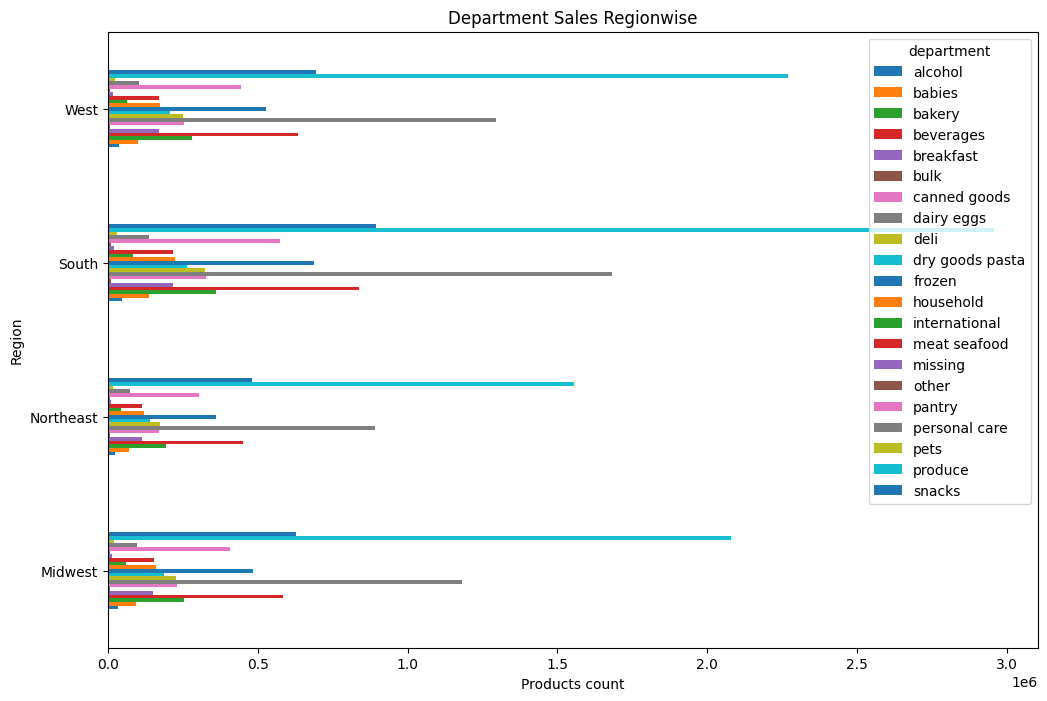

In [23]:
# Visualize using a horizontal BarChart
BarChart_RegionDepartment = Cross_RegionDepartment.plot(kind = 'barh', figsize=(12,8))
plt.title('Department Sales Regionwise')
plt.xlabel('Products count')
plt.ylabel('Region')


In [24]:
BarChart_RegionDepartment.figure.savefig('BarChart_RegionDepartment.png')

In [25]:
# Visualising the orders based on day of week
BarChart_dayofweek = merged_df['orders_day_of_week'].value_counts()

In [26]:
#Checking orders on days of week
BarChart_dayofweek

orders_day_of_week
0    5744325
1    5278055
6    4175041
5    3937100
2    3921025
3    3578050
4    3537828
Name: count, dtype: int64

Text(0.5, 0, '')

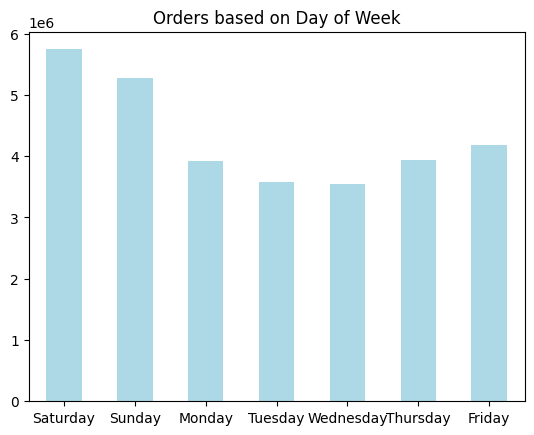

In [27]:
# Creating barchart for orders based on day of week
BarChart_dayofweek=  merged_df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'lightblue')
OrdersBarChart_dayofweek = BarChart_dayofweek.set_title('Orders based on Day of Week')
BarChart_dayofweek.set_xticklabels([ 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
BarChart_dayofweek.set_xlabel("")

In [28]:
# Export the BarChart
OrdersBarChart_dayofweek.figure.savefig('OrdersBarChart_dayofweek.png')

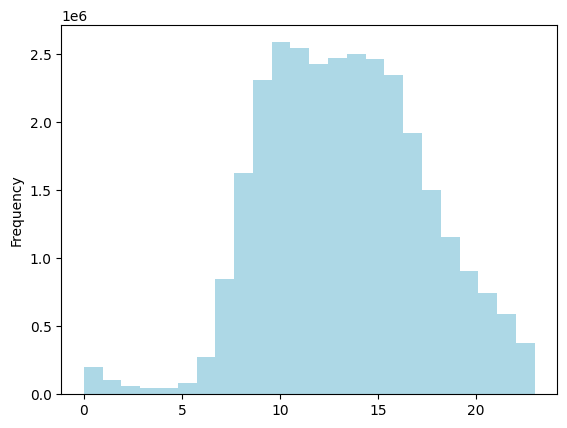

In [29]:
# Visualising the time of order per day
Timeofday_Histogram=merged_df['order_hour_of_day'].plot.hist(bins=24,color='lightblue')

In [30]:
Timeofday_Histogram.figure.savefig('Histogram_Timeofday.png')

In [31]:
# crosstab function to cross and match loyalty to income based on agegroup
Cross_LoyaltyIncome=pd.crosstab(merged_df['loyalty_flag'],merged_df['income_group'],dropna=False)

In [32]:
Cross_LoyaltyIncome

income_group,HIGH,LOW,MEDIUM
loyalty_flag,,,
Loyal customer,1310941,1032934,7940218
New customer,482621,513460,3014474
Regular customer,2008321,1702440,12166015


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

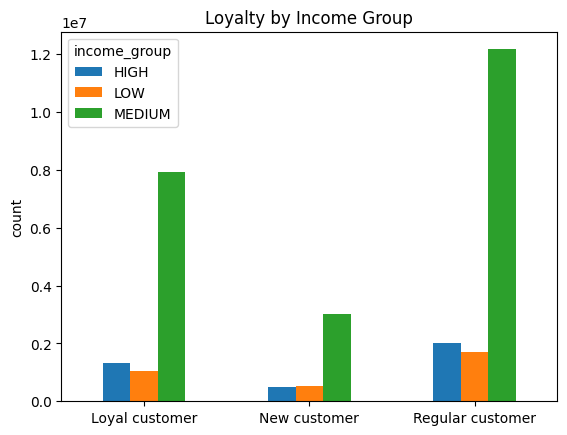

In [33]:
# Visualising loyalty of customer based on their income 
BarChart_LoyaltyIncome = Cross_LoyaltyIncome.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [34]:
#Exporting barchart for loyalty to income group
BarChart_LoyaltyIncome.figure.savefig('Loyalty_Income_GroupBarchart.png')

In [35]:
#cross function to loyalty flag and spending flag to check for 
Cross_LoyaltySpending=pd.crosstab(merged_df['loyalty_flag'],merged_df['spender_flag'],dropna=False)

In [36]:
Cross_LoyaltySpending

spender_flag,High_spender,Low_spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,67914,3942641
Regular customer,302814,15573962


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

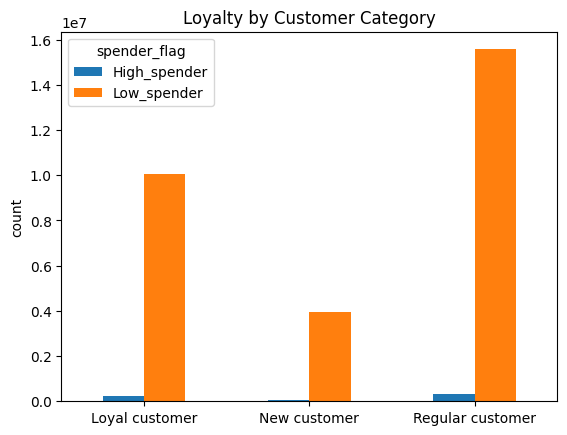

In [37]:
# Visualising loyalty of customer based on their spending
BarChart_LoyaltySpending = Cross_LoyaltySpending.plot.bar()
plt.title('Loyalty by Customer Category')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [38]:
BarChart_LoyaltySpending.figure.savefig('BarChart for LoyaltySpending.png')

In [39]:
Cross_LoyaltyFamilyStatus=pd.crosstab(merged_df['loyalty_flag'],merged_df['fam_status'],dropna=False)

In [40]:
Cross_LoyaltyFamilyStatus

fam_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,336390,184688,2825070,664407
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

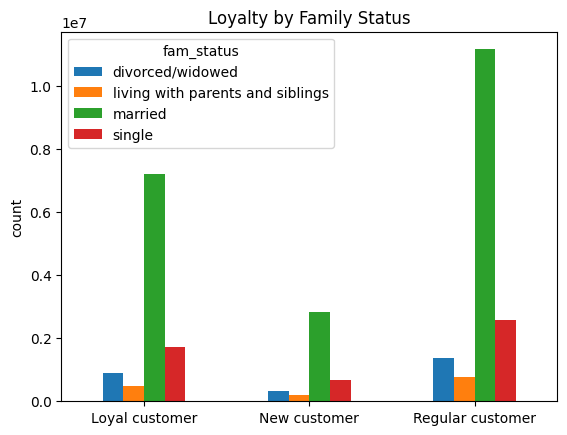

In [41]:
# Visualising loyalty of customer based on their family status
BarChart_LoyaltyFamilyStatus = Cross_LoyaltyFamilyStatus.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [42]:
BarChart_LoyaltyFamilyStatus.figure.savefig('BarChart for Loyalty to family status.png')

In [43]:
Family_Status= merged_df['fam_status'].value_counts(dropna=False)

In [44]:
Family_Status

fam_status
married                             21188130
single                               4961333
divorced/widowed                     2577880
living with parents and siblings     1444081
Name: count, dtype: int64

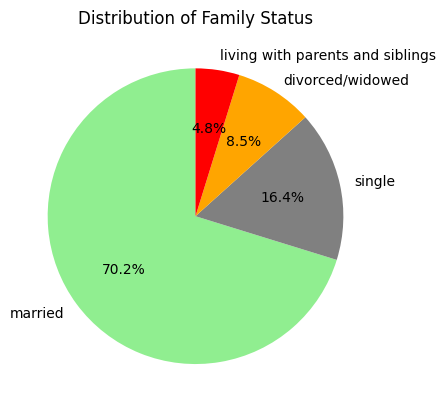

In [45]:
# Visualize the pie chart
PieChart_FamilyStatus = Family_Status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['lightgreen','grey','orange','red'])
# Hide the y-label
plt.ylabel('')  
plt.title('Distribution of Family Status')
plt.show()

In [46]:
PieChart_FamilyStatus.figure.savefig('Piechart Loyalty to Family Status.png')

In [47]:
Cross_LoyaltyDependants=pd.crosstab(merged_df['loyalty_flag'],merged_df['dependant_flag'],dropna=False)

In [48]:
Cross_LoyaltyDependants

dependant_flag,Has Dependants,No Dependants
loyalty_flag,,
Loyal customer,7695249,2588844
New customer,3009758,1000797
Regular customer,11927204,3949572


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

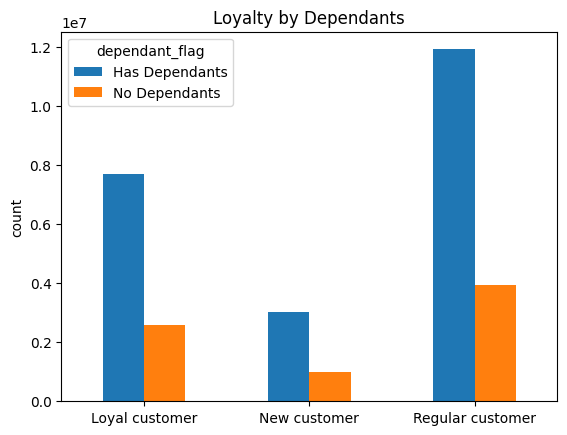

In [49]:
# Visualising loyalty of customer based on their Dependants
BarChart_LoyaltyDependants = Cross_LoyaltyDependants.plot.bar()
plt.title('Loyalty by Dependants')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [50]:
BarChart_LoyaltyDependants.figure.savefig('Barchart for Loyalty to Dependants.png')

In [51]:
Count_FamilyStatus=merged_df['fam_status'].value_counts(dropna=False)

In [52]:
Count_FamilyStatus

fam_status
married                             21188130
single                               4961333
divorced/widowed                     2577880
living with parents and siblings     1444081
Name: count, dtype: int64

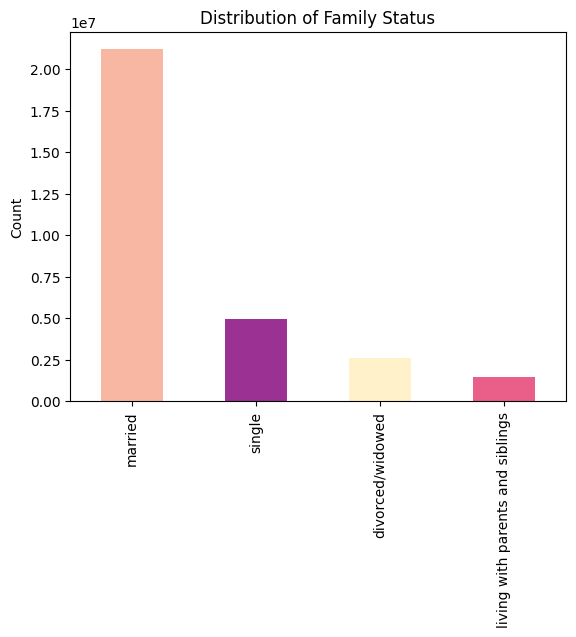

In [53]:
# Visualising Family Status
FamilyStatus_BarChart = Count_FamilyStatus.plot.bar(color = {'#9B3192','#FFF1C9', '#F7B7A3', '#EA5F89'})  
plt.title('Distribution of Family Status')
# Hide the y-label
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [54]:
# Saving the barchart as png
FamilyStatus_BarChart.figure.savefig('Barchart for Distribution of Family Status.png')